# Temat: Co z moim pociągiem?
https://www.kaggle.com/datasets/gatandubuc/public-transport-traffic-data-in-france

## Cel -> analiza opóźnień pociągów we Francji

## Stakeholder -> zarządca kolejowy, który potrzebuje zidentyfikować powody opóźnień na wybranych liniach kolejowych


#### DLA CHĘTNYCH  regresja, modelowanie, WSPÓŁLINIOWOŚĆ

# NOTATKI

### 1. Dodanie kolumny “Trainline”: df['Trainline'] = df['Departure station']+' - '+df['Arrival station']
### 2. Dodanie kolumny ‘Number of circulations’: df[‘Number of circulations’] = df[‘Number of expected circulations’] - df[‘Number of cancelled trains’]
### 3. Wyliczamy średnią dla ‘Number of circulations’ i odrzucamy wszystkie połączenia poniżej średniej (TBC)
### 4. Wybieramy po 5 połączeń z najwyższą średnią ważoną (ważoną po ‘Number of circulations’) dla wartości ‘Average delay of late arriving trains (min)’ i ‘Average delay of all arriving trains (min)’



#### Import bibliotek

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import trains as dc
import datetime as dt
import random


### Wczytanie pliku Regularities_by_liaisons_Trains_France.csv

In [2]:
df = pd.read_csv('kaggle_data/Regularities_by_liaisons_Trains_France.csv')

### Wyświetlanie WSZYSTKICH kolumn w VS Code

In [3]:
pd.set_option('display.max_columns', None)

In [25]:
#df.columns = df.columns.str.replace(" ", "_")

#### Kopia zapasowa pliku CSV

In [4]:
df_clean = df.copy()

#### Delete 2 columns

In [5]:
df_clean.drop(columns = ['Comment (optional) delays at departure', 'Comment (optional) delays on arrival'], inplace = True)

### Drop treshold of 5% missing values

In [6]:
col_to_drop = dc.drop_treshold(df_clean)

df_clean.dropna(subset = col_to_drop, inplace = True)

### Columns in df_clean

In [49]:
df_clean.columns

Index(['Year', 'Month', 'Departure station', 'Arrival station',
       'Average travel time (min)', 'Number of expected circulations',
       'Number of cancelled trains', 'Number of late trains at departure',
       'Average delay of late departing trains (min)',
       'Average delay of all departing trains (min)',
       'Number of trains late on arrival',
       'Average delay of late arriving trains (min)',
       'Average delay of all arriving trains (min)',
       '% trains late due to external causes (weather, obstacles, suspicious packages, malevolence, social movements, etc.)',
       '% trains late due to railway infrastructure (maintenance, works)',
       '% trains late due to traffic management (rail line traffic, network interactions)',
       '% trains late due to rolling stock',
       '% trains late due to station management and reuse of material',
       '% trains late due to passenger traffic (affluence, PSH management, connections)',
       'Number of late trains >

In [61]:
df_clean.head(10)

,Year,Month,Departure station,Arrival station,Average travel time (min),Number of expected circulations,Number of cancelled trains,Number of late trains at departure,Average delay of late departing trains (min),Average delay of all departing trains (min),Number of trains late on arrival,Average delay of late arriving trains (min),Average delay of all arriving trains (min),"% trains late due to external causes (weather, obstacles, suspicious packages, malevolence, social movements, etc.)","% trains late due to railway infrastructure (maintenance, works)","% trains late due to traffic management (rail line traffic, network interactions)",% trains late due to rolling stock,% trains late due to station management and reuse of material,"% trains late due to passenger traffic (affluence, PSH management, connections)",Number of late trains > 15min,Average train delay > 15min,Number of late trains > 30min,Number of late trains > 60min,Period,Delay due to external causes,Delay due to railway infrastructure,Delay due to traffic management,Delay due to rolling stock,Delay due to station management and reuse of material,Delay due to travellers taken into account,Number of circulations,Trainline
0,2019,7.0,ANGOULEME,PARIS MONTPARNASSE,131.914980,247.0,0.0,191.0,3.576353,2.678273,41.0,22.924797,5.233333,0.250000,0.150000,0.275000,0.125000,0.025000,0.175000,21.0,32.965873,7.0,2.0,2019-07,25.000000,15.000000,27.500000,12.500000,2.500000,17.500000,247.0,ANGOULEME - PARIS MONTPARNASSE
1,2019,7.0,PARIS MONTPARNASSE,LA ROCHELLE VILLE,175.611570,242.0,0.0,178.0,9.780805,7.033609,47.0,27.085106,6.123967,0.200000,0.244444,0.266667,0.244444,0.000000,0.044444,35.0,32.057143,14.0,2.0,2019-07,20.000000,24.444444,26.666667,24.444444,0.000000,4.444444,242.0,PARIS MONTPARNASSE - LA ROCHELLE VILLE
2,2019,7.0,LE MANS,PARIS MONTPARNASSE,62.395349,435.0,5.0,391.0,3.896974,3.529341,91.0,18.440659,4.430194,0.161765,0.323529,0.264706,0.147059,0.029412,0.073529,30.0,42.367241,13.0,4.0,2019-07,16.176471,32.352941,26.470588,14.705882,2.941176,7.352941,430.0,LE MANS - PARIS MONTPARNASSE
3,2019,7.0,ST MALO,PARIS MONTPARNASSE,172.421053,114.0,0.0,101.0,1.950990,1.685673,15.0,20.618889,3.812135,0.153846,0.153846,0.230769,0.384615,0.000000,0.076923,8.0,27.620833,2.0,0.0,2019-07,15.384615,15.384615,23.076923,38.461538,0.000000,7.692308,114.0,ST MALO - PARIS MONTPARNASSE
4,2019,7.0,PARIS MONTPARNASSE,ST PIERRE DES CORPS,67.310000,404.0,4.0,284.0,8.379108,5.803125,73.0,19.608447,4.176208,0.184615,0.123077,0.400000,0.169231,0.076923,0.046154,28.0,37.658333,12.0,3.0,2019-07,18.461538,12.307692,40.000000,16.923077,7.692308,4.615385,400.0,PARIS MONTPARNASSE - ST PIERRE DES CORPS
5,2019,7.0,PARIS MONTPARNASSE,TOULOUSE MATABIAU,266.594737,190.0,0.0,123.0,4.765989,2.887719,28.0,47.343452,8.422105,0.259259,0.333333,0.222222,0.185185,0.000000,0.000000,28.0,47.343452,13.0,4.0,2019-07,25.925926,33.333333,22.222222,18.518519,0.000000,0.000000,190.0,PARIS MONTPARNASSE - TOULOUSE MATABIAU
6,2019,7.0,TOULOUSE MATABIAU,PARIS MONTPARNASSE,265.262887,194.0,0.0,86.0,5.124225,1.714691,29.0,45.610920,8.407474,0.379310,0.275862,0.068966,0.206897,0.034483,0.034483,29.0,45.610920,13.0,4.0,2019-07,37.931034,27.586207,6.896552,20.689655,3.448276,3.448276,194.0,TOULOUSE MATABIAU - PARIS MONTPARNASSE
7,2019,7.0,PARIS EST,METZ,85.399381,323.0,0.0,239.0,10.278452,7.552477,52.0,37.144872,5.523633,0.240000,0.180000,0.160000,0.260000,0.160000,0.000000,28.0,60.874405,16.0,11.0,2019-07,24.000000,18.000000,16.000000,26.000000,16.000000,0.000000,323.0,PARIS EST - METZ
8,2019,7.0,PARIS EST,REIMS,46.305556,222.0,6.0,190.0,4.985263,4.361883,36.0,28.539352,5.154244,0.323529,0.147059,0.176471,0.235294,0.117647,0.000000,18.0,47.841667,11.0,5.0,2019-07,32.352941,14.705882,17.647059,23.529412,11.764706,0.000000,216.0,PARIS EST - REIMS
9,2019,7.0,PARIS NORD,DOUAI,67.000000,180.0,3.0,63.0,13.862169,4.626083,30.0,25.513889,3.633051,0.066667,0.266667,0.200000,0.200000,0.266667,0.000000,18.0,35.613889,10.0,3.0,2019-07,6.66

In [ ]:
df_clean.isna().sum()

In [116]:
df_clean.Year.value_counts()

Year
2018    1486
2019    1465
2017    1342
2016    1297
2015    1295
2020     635
Name: count, dtype: int64

#### 10 największych opóźnień pociągów wraz ze stacjami

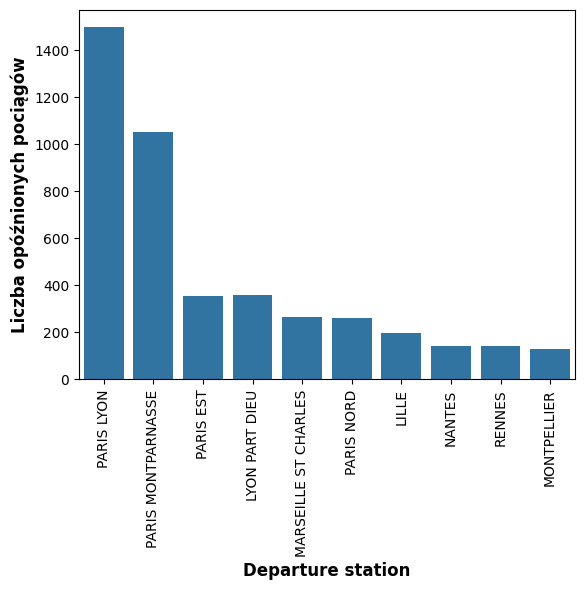

In [48]:
colors = random.sample(sns.color_palette("husl", 10), 10)

sns.countplot(data = df_clean, x = "Departure station", order = df['Departure station'].value_counts().index[:10], legend=False)

plt.ylabel("Liczba opóźnionych pociągów", fontweight = "bold", fontsize = 12)
plt.xlabel("Departure station", fontweight = "bold", fontsize = 12)
plt.xticks(rotation = 90,)
plt.show()

In [46]:
df_clean[df_clean['% trains late due to external causes (weather, obstacles, suspicious packages, malevolence, social movements, etc.)'] == 'External Causes']

,Year,Month,Departure station,Arrival station,Average travel time (min),Number of expected circulations,Number of cancelled trains,Number of late trains at departure,Average delay of late departing trains (min),Average delay of all departing trains (min),Number of trains late on arrival,Average delay of late arriving trains (min),Average delay of all arriving trains (min),"% trains late due to external causes (weather, obstacles, suspicious packages, malevolence, social movements, etc.)","% trains late due to railway infrastructure (maintenance, works)","% trains late due to traffic management (rail line traffic, network interactions)",% trains late due to rolling stock,% trains late due to station management and reuse of material,"% trains late due to passenger traffic (affluence, PSH management, connections)",Number of late trains > 15min,Average train delay > 15min,Number of late trains > 30min,Number of late trains > 60min,Period,Delay due to external causes,Delay due to railway infrastructure,Delay due to traffic management,Delay due to rolling stock,Delay due to station management and reuse of material,Delay due to travellers taken into account,Number of circulations,Trainline


In [68]:
column_al = {
"% trains late due to external causes (weather, obstacles, suspicious packages, malevolence, social movements, etc.)": "External Causes",
"% trains late due to railway infrastructure (maintenance, works)": "Infrastructure"
}

correlation_matrix = df_clean[list(column_al.values())].corr()

plt.figure(figsize=(8, 6))

sns.barplot(x = correlation_matrix.index, y = correlation_matrix['Infrastructure'], hue = correlation_matrix.index, palette = "coolwarm")
plt.title("Korelacja między opóźnieniami zewnętrznymi a infrastrukturą kolejową", fontweight = "bold")
plt.xlabel("Przyczyny zewnętrzne")
plt.ylabel("Korelacja")
plt.xticks(rotation = 45)

plt.show()

KeyError: "None of [Index(['External Causes', 'Infrastructure'], dtype='object')] are in the [columns]"

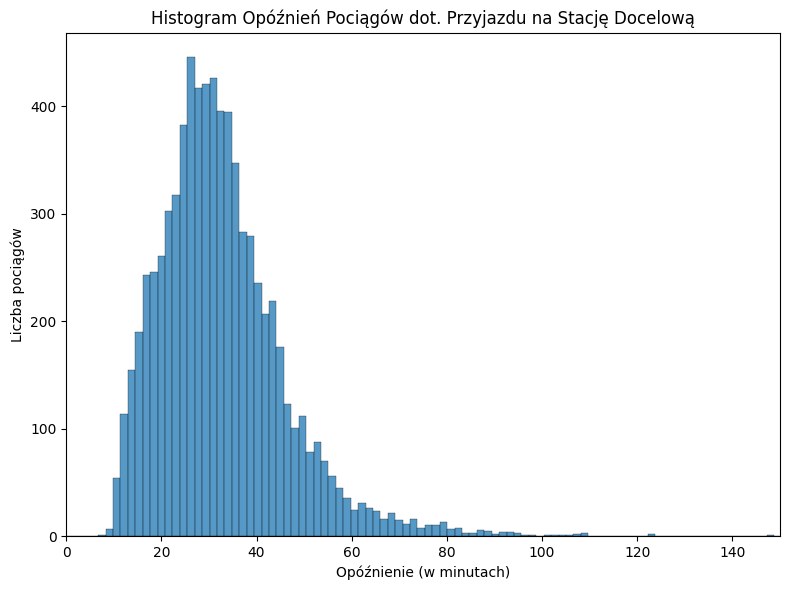

In [35]:
# Utwórz histogram za pomocą seaborn na podstawie rzeczywistych danych
plt.figure(figsize=(8, 6))
sns.histplot(data=df_clean, x='Average delay of late arriving trains (min)')
plt.title('Histogram Opóźnień Pociągów dot. Przyjazdu na Stację Docelową')
plt.xlabel('Opóźnienie (w minutach)')
plt.ylabel('Liczba pociągów')

#plt.ylim(0, 1000)
plt.xlim(0, 150)

#stacje = df['Departure_station'].unique()[:3]
#plt.xticks(range(len(stacje)), stacje, rotation=45, ha='right')

plt.tight_layout()
plt.show()

#### Zrobić regresję regplot(), modelowanie, WSPÓŁLINIOWOŚĆ

In [62]:
df_clean['Year'].value_counts()

Year
2018    1486
2019    1465
2017    1342
2016    1297
2015    1295
2020     635
Name: count, dtype: int64

#### Warto zacząć od Scatter plot

In [124]:
df_clean.groupby("Average travel time (min)")["Number of expected circulations"].mean().nlargest(10)

#result_df = pd.DataFrame({'Average travel time (min)': numb_expected_circulations.index, 'Number of expected circulations': numb_expected_circulations.values})

Average travel time (min)
148.309724    960.0
142.443670    896.0
142.167051    894.0
141.071174    878.0
140.289346    876.0
143.052934    871.0
141.109827    870.0
142.851415    864.0
143.317967    858.0
140.895270    844.0
Name: Number of expected circulations, dtype: float64

### Subtraction of canceled trips

In [14]:
df_clean['Number of circulations'] = df_clean['Number of expected circulations'] - df_clean['Number of cancelled trains']
df_clean['Number of circulations']

0       247.0
1       242.0
2       430.0
3       114.0
4       400.0
        ...  
7800    149.0
7801    168.0
7802    199.0
7803    116.0
7805     52.0
Name: Number of circulations, Length: 7520, dtype: float64

### Average 'Number of circulations'

In [15]:
avg_num_circulations = df_clean['Number of circulations'].mean()

##
delays_circ = df_clean[df_clean['Number of circulations'] > avg_num_circulations]
delays_circ_sorted = delays_circ.sort_values(by='Number of circulations', ascending = False)

delays_circ_sorted
##

avg_num_circulations

263.1601063829787

# >>>Weighted average<<<

In [16]:
w_sum_late_arriving = (delays_circ_sorted['Number of circulations'] * delays_circ_sorted['Average delay of late arriving trains (min)']).sum()
w_sum_all_arriving = (delays_circ_sorted['Number of circulations'] * delays_circ_sorted['Average delay of all arriving trains (min)']).sum()

w_avg_late_arriving = w_sum_late_arriving / delays_circ_sorted['Number of circulations'].sum()
w_avg_all_arriving = w_sum_all_arriving / delays_circ_sorted['Number of circulations'].sum()

print(f"Średnia ważona dla 'Average delay of LATE arriving trains (min)': {w_avg_late_arriving:.2f}")
print(f"Średnia ważona dla 'Average delay of ALL arriving trains (min)': {w_avg_all_arriving:.2f}")

Średnia ważona dla 'Average delay of LATE arriving trains (min)': 30.38
Średnia ważona dla 'Average delay of ALL arriving trains (min)': 4.80


In [ ]:
top_5_late_arriving = delays_circ_sorted[delays_circ_sorted['Number of circulations'] > w_avg_late_arriving]

print(f"Połączenia z największą średnią ważoną dla 'Average delay of LATE arriving trains (min)':\n{top_5_late_arriving.head(10)}")

In [ ]:
top_5_all_arriving = delays_circ_sorted[delays_circ_sorted['Average delay of all arriving trains (min)'] > w_avg_all_arriving].head(20)

print(f"Połączenia z największą średnią ważoną dla 'Average delay of ALL arriving trains (min)':\n{top_5_all_arriving.head(20)}")

### Connection two columns 'Departure station' and 'Arrival station' TRAINLINE

In [25]:
df_clean['Trainline'] = df_clean['Departure station'] + ' - ' + df_clean['Arrival station']
df_clean['Trainline']

0                 ANGOULEME - PARIS MONTPARNASSE
1         PARIS MONTPARNASSE - LA ROCHELLE VILLE
2                   LE MANS - PARIS MONTPARNASSE
3                   ST MALO - PARIS MONTPARNASSE
4       PARIS MONTPARNASSE - ST PIERRE DES CORPS
                          ...                   
7800            AIX EN PROVENCE TGV - PARIS LYON
7801                    PARIS LYON - AVIGNON TGV
7802           PARIS LYON - MARSEILLE ST CHARLES
7803                          PARIS LYON - NIMES
7805                         TOULON - PARIS LYON
Name: Trainline, Length: 7520, dtype: object

In [37]:
max_delay = df['Average delay of all departing trains (min)'].max()

delay_all_departing = df['Average delay of all departing trains (min)']

print(f"Największe opóźnienie odjeżdżającego pociągu: {max_delay:.1f} minut")

Największe opóźnienie odjeżdżającego pociągu: 173.6 minut


### Biggest delay trainline between 2015 and 2020

In [19]:
delay_year_2015 = df_clean[(df_clean['Year'] >= 2015) & (df_clean['Year'] <= 2020)]['Average delay of late departing trains (min)'].max()

if delay_year_2015 > w_avg_late_arriving:
    print(f"Największe opóźnienie w 2015 roku było na linii: \n{df_clean['Trainline']} i wynosi {delay_year_2015} min")


Największe opóźnienie w 2015 roku było na linii: 
0                 ANGOULEME - PARIS MONTPARNASSE
1         PARIS MONTPARNASSE - LA ROCHELLE VILLE
2                   LE MANS - PARIS MONTPARNASSE
3                   ST MALO - PARIS MONTPARNASSE
4       PARIS MONTPARNASSE - ST PIERRE DES CORPS
                          ...                   
7800            AIX EN PROVENCE TGV - PARIS LYON
7801                    PARIS LYON - AVIGNON TGV
7802           PARIS LYON - MARSEILLE ST CHARLES
7803                          PARIS LYON - NIMES
7805                         TOULON - PARIS LYON
Name: Trainline, Length: 7520, dtype: object i wynosi 316.188095238 min


### Average circulations each year between 2015 and 2020

In [26]:
max_circulations_each_year = df_clean.groupby('Year')['Number of circulations'].mean()

max_circulations_each_year

Year
2015    293.460232
2016    278.312259
2017    288.956036
2018    252.541723
2019    251.645734
2020    167.314961
Name: Number of circulations, dtype: float64

### The impact of the pandemic (2020) on train delays
### 'Average delay of all departing trains (min)' and 'Average delay of late arriving trains (min)' 

In [27]:
delay_pandemic_all_arriving_trains = df_clean[(df_clean['Year'] == 2020) & (df_clean['Average delay of all arriving trains (min)'] > w_avg_all_arriving)][['Year','Trainline','Average delay of all arriving trains (min)']].sort_values(by = 'Average delay of all arriving trains (min)', ascending = False).head(25)

delay_pandemic_late_arriving_trains = df_clean[(df_clean['Year'] == 2020) & (df_clean['Average delay of late arriving trains (min)'] > w_avg_late_arriving)][['Year','Trainline','Average delay of late arriving trains (min)']].sort_values(by = 'Average delay of late arriving trains (min)', ascending = False).head(25)

delay_pandemic_all_arriving_trains
#delay_pandemic_late_arriving_trains


,Year,Trainline,Average delay of all arriving trains (min)
7421,2020,STRASBOURG - PARIS EST,83.388889
7526,2020,PARIS LYON - ZURICH,37.838235
7054,2020,NANTES - STRASBOURG,27.489286
7149,2020,ST PIERRE DES CORPS - PARIS MONTPARNASSE,24.795833
7527,2020,ZURICH - PARIS LYON,22.825000
7627,2020,ITALIE - PARIS LYON,20.655172
7007,2020,TOURCOING - BORDEAUX ST JEAN,17.988462
7506,2020,BORDEAUX ST JEAN - PARIS MONTPARNASSE,17.791071
7306,2020,TOULOUSE MATABIAU - PARIS MONTPARNASSE,17.173718
7187,2020,NANTES - STRASBOURG,16.821053


In [ ]:
sns.boxplot(data= df_clean, x = 'Average delay of all arriving trains (min)')
plt.show()

### 'all arriving trains' and 'late arriving trains' delays in 2015-2020 

In [28]:
arriving_delay_trains = df_clean[df_clean['Average delay of all arriving trains (min)'] > w_avg_all_arriving][['Year','Trainline','Average delay of all arriving trains (min)']].sort_values(by = 'Average delay of all arriving trains (min)', ascending = False).head(25)
late_delay_trains = df_clean[df_clean['Average delay of late arriving trains (min)'] > w_avg_all_arriving][['Year','Trainline','Average delay of late arriving trains (min)']].sort_values(by = 'Average delay of late arriving trains (min)', ascending = False).head(25)


#arriving_delay_trains
late_delay_trains

,Year,Trainline,Average delay of late arriving trains (min)
4604,2015,NANTES - STRASBOURG,258.000000
1942,2016,PARIS EST - FRANCFORT,220.000000
2235,2016,LA ROCHELLE VILLE - PARIS MONTPARNASSE,176.000000
3643,2016,PARIS MONTPARNASSE - LA ROCHELLE VILLE,148.000000
6783,2019,BARCELONA - PARIS LYON,122.927778
4279,2018,NANTES - PARIS VAUGIRARD,122.666667
4085,2019,MARSEILLE ST CHARLES - MADRID,109.095833
191,2019,GRENOBLE - PARIS LYON,108.351667
2505,2018,PARIS VAUGIRARD - RENNES,108.300000
5577,2015,PARIS MONTPARNASSE - BREST,107.466667


ValueError: Could not interpret value `Days` for `x`. An entry with this name does not appear in `data`.

C:\Users\marci\AppData\Local\Temp\ipykernel_17204\772400946.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Trainline", y="Average delay of late arriving trains (min)", data = top_10_late_delay_trains, palette="viridis", legend = False)


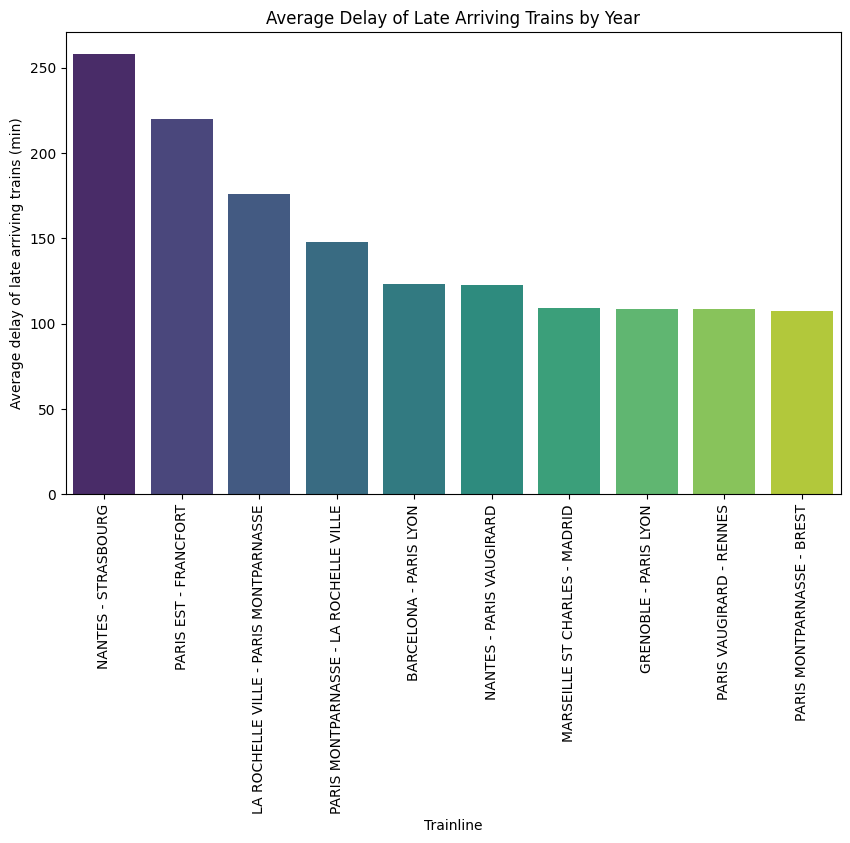

In [29]:
late_delay_trains = late_delay_trains.sort_values(by = 'Average delay of late arriving trains (min)', ascending = False)

top_10_late_delay_trains = late_delay_trains.head(10)

plt.figure(figsize=(10, 6)) 
sns.barplot(x="Trainline", y="Average delay of late arriving trains (min)", data = top_10_late_delay_trains, palette="viridis", legend = False)

plt.title("Average Delay of Late Arriving Trains by Year")
plt.xticks(rotation = 90,)

plt.show()

### 'Number of late trains > 15min > 30min > 60min'

In [65]:
# Grupowanie danych według roku i różnych poziomów opóźnień
arriving_delay_by_year = df_clean.groupby('Year').agg({
    'Number of late trains > 15min': 'sum',
    'Number of late trains > 30min': 'sum',
    'Number of late trains > 60min': 'sum'
}, as_index=False)

# Wyświetlenie wyników
print(arriving_delay_by_year)


      Number of late trains > 15min  Number of late trains > 30min  \
Year                                                                 
2015                        29624.0                        13125.0   
2016                        29968.0                        13362.0   
2017                        38522.0                        16756.0   
2018                        44941.0                        20509.0   
2019                        35322.0                        16530.0   
2020                         9057.0                         4061.0   

      Number of late trains > 60min  
Year                                 
2015                         5011.0  
2016                         4782.0  
2017                         5968.0  
2018                         7212.0  
2019                         6289.0  
2020                         1300.0  


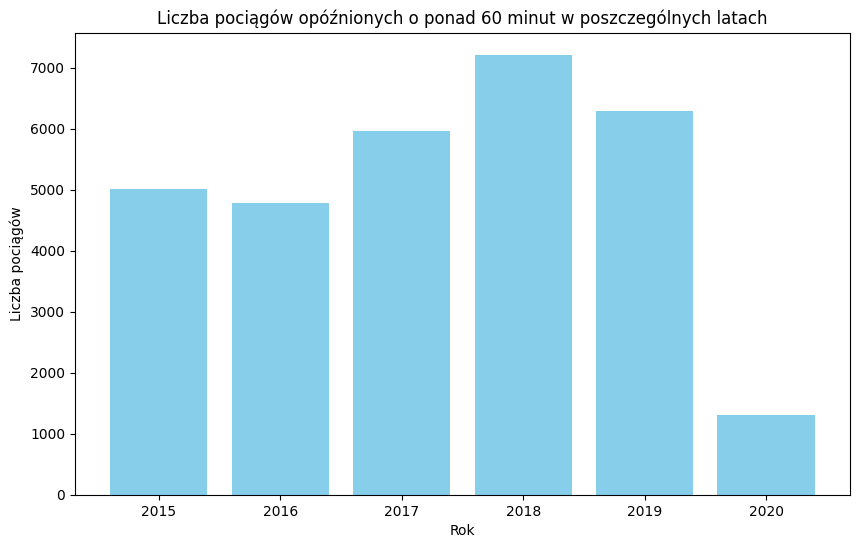

In [76]:
# Stwórz wykres słupkowy
plt.figure(figsize=(10, 6))
plt.bar(arriving_delay_by_year.index, arriving_delay_by_year['Number of late trains > 60min'], color='skyblue')

# Dodaj tytuł i etykiety osi
plt.title('Liczba pociągów opóźnionych o ponad 60 minut w poszczególnych latach')
plt.xlabel('Rok')
plt.ylabel('Liczba pociągów')

# Wyświetl wykres
plt.show()

### Opóźnienie w zależności od zakłóceń każdego roku

In [55]:
delay_disruptions_of_year = df_clean.groupby('Year')[['Delay due to external causes', 'Delay due to railway infrastructure',
           'Delay due to traffic management', 'Delay due to rolling stock']].sum()

print(f"{delay_disruptions_of_year}")

      Delay due to external causes  Delay due to railway infrastructure  \
Year                                                                      
2015                  39223.710033                         33840.929940   
2016                  38959.180722                         34325.948601   
2017                  34044.559762                         33097.396814   
2018                  38326.397753                         34182.607987   
2019                  37121.823832                         33671.215581   
2020                  13526.558017                         22805.068791   

      Delay due to traffic management  Delay due to rolling stock  
Year                                                               
2015                     20280.159671                19320.356294  
2016                     21416.496370                17599.045671  
2017                     27528.987940                28283.253821  
2018                     30945.315196                32300.

In [60]:
delay_disruptions_of_year = df_clean.groupby('Year')['Delay due to external causes'].sum()

print(f"{delay_disruptions_of_year}")

Year
2015    39223.710033
2016    38959.180722
2017    34044.559762
2018    38326.397753
2019    37121.823832
2020    13526.558017
Name: Delay due to external causes, dtype: float64


### On which railway line are the most and least likely to experience delays as a result of disruptions?

In [44]:
disruptions_trainline = df_clean.groupby('Trainline')[['Delay due to external causes', 'Delay due to railway infrastructure',
           'Delay due to traffic management', 'Delay due to rolling stock']].sum()

disruptions_trainline.sort_values(by='Delay due to external causes', ascending=False)
disruptions_trainline.sort_values(by='Delay due to railway infrastructure', ascending=False, inplace=True)
disruptions_trainline.sort_values(by='Delay due to traffic management', ascending=False, inplace=True)
disruptions_trainline.sort_values(by='Delay due to rolling stock', ascending=False, inplace=True)

# Wyświetlenie wyników
print(disruptions_trainline.head(6))

                                         Delay due to external causes  \
Trainline                                                               
PARIS LYON - DIJON VILLE                                  1436.126736   
PARIS LYON - MACON LOCHE                                  1565.854515   
PARIS LYON - VALENCE ALIXAN TGV                           1584.118057   
PARIS LYON - BESANCON FRANCHE COMTE TGV                   1519.107597   
PARIS LYON - AIX EN PROVENCE TGV                          2052.981640   
PARIS LYON - MARSEILLE ST CHARLES                         2176.565493   

                                         Delay due to railway infrastructure  \
Trainline                                                                      
PARIS LYON - DIJON VILLE                                         1278.701520   
PARIS LYON - MACON LOCHE                                         1315.789463   
PARIS LYON - VALENCE ALIXAN TGV                                  1212.463935   
PARIS LYON - BE

In [67]:
arriving_delay_by_year.head()

,Number of late trains > 15min,Number of late trains > 30min,Number of late trains > 60min
Year,,,
2015,29624.0,13125.0,5011.0
2016,29968.0,13362.0,4782.0
2017,38522.0,16756.0,5968.0
2018,44941.0,20509.0,7212.0
2019,35322.0,16530.0,6289.0
